In [1]:
import pandas  #importing pandas library
#import dataset files
combats = pandas.read_csv('C:/Users/Kemal Bektas/Desktop/phyton/input/combats.csv')  #matchups and results
pokemon = pandas.read_csv('C:/Users/Kemal Bektas/Desktop/phyton/input/pokemon.csv')  #pokemons and their attributes

combats.head(5) #checking first 10 columns of combats
#it can be seen that combats only have pokemon numbers and winners

,First_pokemon,Second_pokemon,Winner
0,266,298,298
1,702,701,701
2,191,668,668
3,237,683,683
4,151,231,151


In [2]:
pokemon.head(5) #checking first 10 columns of pokemon
#it can be seen all features are defined in pokemon.csv

,#,Name,Type 1,Type 2,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
0,1,Bulbasaur,Grass,Poison,45,49,49,65,65,45,1,False
1,2,Ivysaur,Grass,Poison,60,62,63,80,80,60,1,False
2,3,Venusaur,Grass,Poison,80,82,83,100,100,80,1,False
3,4,Mega Venusaur,Grass,Poison,80,100,123,122,120,80,1,False
4,5,Charmander,Fire,NaN,39,52,43,60,50,65,1,False


In [3]:
pokemon.shape 
# this data contains 800 pokemons with 12 features


(800, 12)

In [4]:
pokemon.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 800 entries, 0 to 799
Data columns (total 12 columns):
#             800 non-null int64
Name          799 non-null object
Type 1        800 non-null object
Type 2        414 non-null object
HP            800 non-null int64
Attack        800 non-null int64
Defense       800 non-null int64
Sp. Atk       800 non-null int64
Sp. Def       800 non-null int64
Speed         800 non-null int64
Generation    800 non-null int64
Legendary     800 non-null bool
dtypes: bool(1), int64(8), object(3)
memory usage: 69.6+ KB


In [5]:
pokemon[pokemon.Name.isnull()]  #checking which name value is missing
pokemon['Name'].fillna(value = 'Kemal',inplace=True) 
#filling it with my name since names doesn'T affect results


In [6]:
pokemon['Type 2'].fillna(value = 'NoType2',inplace=True) 
#for the missing values of Type 2 I created a new Class
#That seems convenient, almost half of the pokemons don't have type 2 so the algorithm probably will not find any supremacy of 
# 'NoType2'. However, it may affect the weight of the Type 2 values.

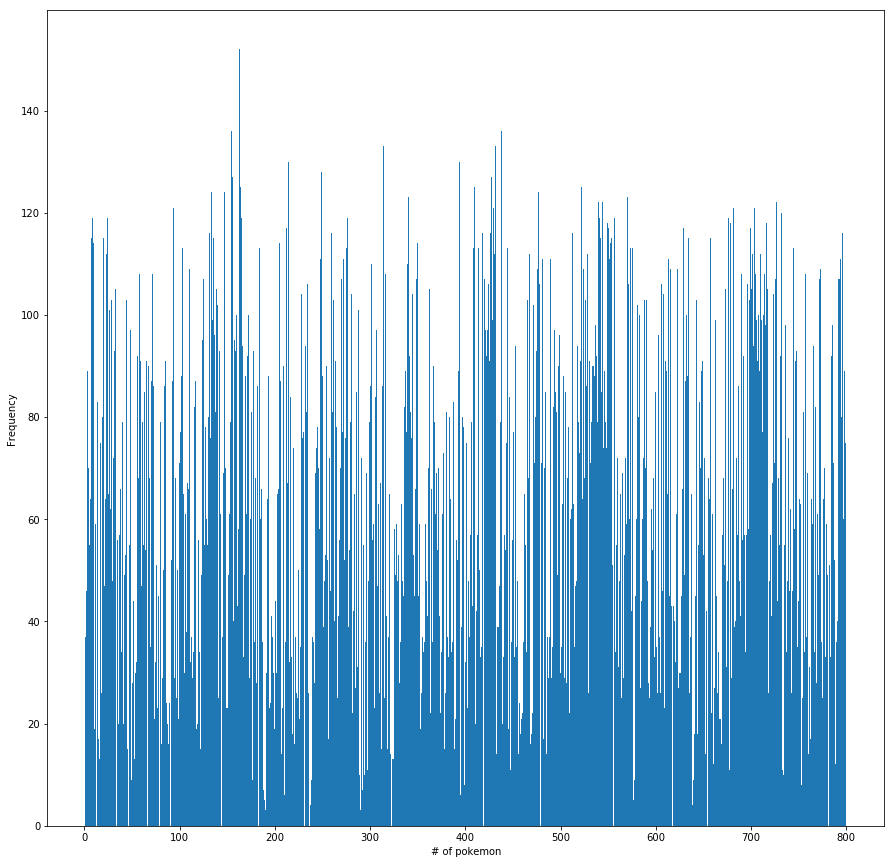

In [7]:
#visualizing win count of pokemons
import matplotlib.pyplot as plt 
combats.Winner.plot(kind = 'hist',bins =800,figsize = (15,15)) 
plt.xlabel('# of pokemon')
plt.show()

In [8]:
pokemon.dtypes

#              int64
Name          object
Type 1        object
Type 2        object
HP             int64
Attack         int64
Defense        int64
Sp. Atk        int64
Sp. Def        int64
Speed          int64
Generation     int64
Legendary       bool
dtype: object

In [9]:
#we should convert objects to categories
pokemon['Type 1'] = pokemon['Type 1'].astype('category')
pokemon['Type 2'] = pokemon['Type 2'].astype('category') 
pokemon['Legendary']=pokemon['Legendary']*1 #I used a tricky way to convert boolean values to 1 and 0 s.
pokemon.dtypes

#                int64
Name            object
Type 1        category
Type 2        category
HP               int64
Attack           int64
Defense          int64
Sp. Atk          int64
Sp. Def          int64
Speed            int64
Generation       int64
Legendary        int32
dtype: object

In [10]:
#converting these categories to booleans
pokemon=pandas.get_dummies(pokemon, columns=["Type 1", "Type 2"])  

In [11]:
pokemon1=pokemon.copy()
pokemon2=pokemon.copy()
pokemon1.columns = ['1_' + str(col)  for col in pokemon1.columns]
pokemon2.columns = ['2_' + str(col)  for col in pokemon2.columns]
battle=pandas.merge(combats,pokemon1,left_on = 'First_pokemon', right_on = '1_#')
battle=pandas.merge(battle,pokemon2,left_on = 'Second_pokemon', right_on = '2_#')

In [12]:
#creating a result classification column
battle["First_win"] = battle.apply(lambda x: 1 if x["First_pokemon"]==x["Winner"] else 0,axis=1)

In [13]:
#Now I don't need pokemon names,numbers, winner number, I will delete them
del battle['First_pokemon']
del battle['Second_pokemon']
del battle['Winner']
del battle['1_#']
del battle['2_#']
del battle['1_Name']
del battle['2_Name']

In [14]:
battle.info() #now my battle dataset is ready with all non-null integer values

<class 'pandas.core.frame.DataFrame'>
Int64Index: 50000 entries, 0 to 49999
Data columns (total 91 columns):
1_HP                 50000 non-null int64
1_Attack             50000 non-null int64
1_Defense            50000 non-null int64
1_Sp. Atk            50000 non-null int64
1_Sp. Def            50000 non-null int64
1_Speed              50000 non-null int64
1_Generation         50000 non-null int64
1_Legendary          50000 non-null int32
1_Type 1_Bug         50000 non-null uint8
1_Type 1_Dark        50000 non-null uint8
1_Type 1_Dragon      50000 non-null uint8
1_Type 1_Electric    50000 non-null uint8
1_Type 1_Fairy       50000 non-null uint8
1_Type 1_Fighting    50000 non-null uint8
1_Type 1_Fire        50000 non-null uint8
1_Type 1_Flying      50000 non-null uint8
1_Type 1_Ghost       50000 non-null uint8
1_Type 1_Grass       50000 non-null uint8
1_Type 1_Ground      50000 non-null uint8
1_Type 1_Ice         50000 non-null uint8
1_Type 1_Normal      50000 non-null uint8
1_Type 1_

In [15]:
#splittin 5 percent of the data (2500 matches) for the test part
from sklearn.model_selection import train_test_split
X = battle.drop("First_win", axis=1)
y = battle["First_win"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.05, random_state=42) 
#Random_state is set to prevent getting different results for every run.(keeping randomness constant) 

In [16]:
#logistic Regression Classifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

logreg = LogisticRegression() #creating the classifier
logreg.fit(X_train, y_train) #training it
preds_logreg=logreg.predict(X_test) #making predictions

accuracy_logreg=accuracy_score(y_test, preds_logreg)
print ("The accuracy of Logistic Regression Classifier is "+ str(accuracy_logreg) +".")

The accuracy of Logistic Regression Classifier is 0.884.


In [17]:
#K-Nearest Neighbor Classifier
from sklearn.neighbors import KNeighborsClassifier
neighbors_range= range(1,16)
accuracy_knn=0
optimum=0
import numpy as np
accuracyn= np.zeros((16,1))
for n in neighbors_range:
    knn=KNeighborsClassifier(n_neighbors=n)
    knn=knn.fit(X_train,y_train)
    preds=knn.predict(X_test)
    accuracyn[n]=accuracy_score(y_test,preds)
    if accuracyn[n]>accuracy_knn:
        accuracy_knn=accuracyn[n]
        optimum=n

print ("The optimum number of neighbors is " + str(optimum) +" with the " + str(accuracy_knn) + " accuracy")

# I made a simple optimization for the number of the neighbors

The optimum number of neighbors is 13 with the [ 0.8964] accuracy


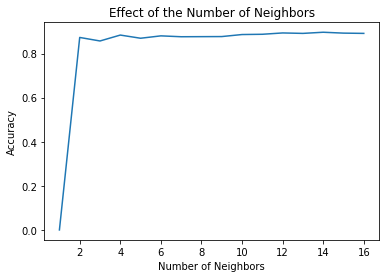

In [18]:
#Visualization of this optimization
neighbors= range(1,17)
plt.plot(neighbors,accuracyn)
plt.title('Effect of the Number of Neighbors')
plt.xlabel('Number of Neighbors')
plt.ylabel('Accuracy')
plt.show()

In [19]:
# Gaussian Naive Bayes Classifier
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()
gnb.fit(X_train, y_train)
preds_gnb=knn.predict(X_test)
accuracy_gnb=accuracy_score(y_test,preds_gnb)
print ("The accuracy of Gaussian Naive Bayes Classifier is "+ str(accuracy_gnb) +".")

The accuracy of Gaussian Naive Bayes Classifier is 0.8912.


In [20]:
# Perceptron Classification
from sklearn.linear_model import Perceptron
perceptron = Perceptron(max_iter=1000)
perceptron.fit(X_train, y_train)
preds_perceptron=knn.predict(X_test)
accuracy_perceptron=accuracy_score(y_test,preds_perceptron)
print ("The accuracy of Perceptron Classifier is " + str(accuracy_perceptron) +".")

The accuracy of Perceptron Classifier is 0.8912.


In [21]:
#Neural Networks Classification
#I will create 2 classifiers to observe the effect 
#of number of hidden layers
from sklearn.neural_network import MLPClassifier
import numpy as np
accuracy_mlp=0;
optimum_n=0;
accuracy= np.zeros((20,1))
for layers in range (1,20):
    mlp=MLPClassifier(hidden_layer_sizes=layers,solver='sgd'
                      ,learning_rate = 'adaptive',
                      learning_rate_init=0.001)
    mlp.fit(X_train, y_train)
    preds_mlp=mlp.predict(X_test)
    accuracy[layers]=accuracy_score(y_test,preds_mlp)
    if accuracy[layers]>accuracy_mlp:
        accuracy_mlp=accuracy[layers]
        optimum_n=layers
print ("The optimum number of hidden layers is " +
       str(optimum_n) +" with the " + str(accuracy_knn) + " accuracy")        

The optimum number of hidden layers is 13 with the [ 0.8964] accuracy


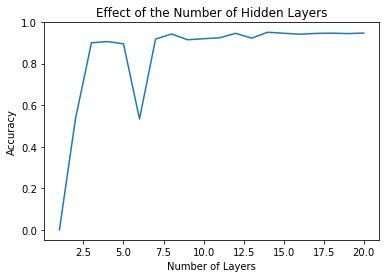

In [22]:
#Visualization of this optimization
numberoflayers= range(1,21)
plt.plot(numberoflayers,accuracy)
plt.title('Effect of the Number of Hidden Layers')
plt.xlabel('Number of Layers')
plt.ylabel('Accuracy')
plt.show()

In [23]:
#Decision Tree Classifier
from sklearn.tree import DecisionTreeClassifier
tree = DecisionTreeClassifier()
tree.fit(X_train, y_train)
preds_tree=tree.predict(X_test)
accuracy_tree=accuracy_score(y_test,preds_tree)
print ("The accuracy of Decision Tree Classifier is "+ str(accuracy_tree) +".")

The accuracy of Decision Tree Classifier is 0.9544.


In [24]:
# Random Forest Classifier
from sklearn.ensemble import RandomForestClassifier
forest = RandomForestClassifier(n_estimators=100)
forest.fit(X_train, y_train)
preds_forest=forest.predict(X_test)
accuracy_forest=accuracy_score(y_test,preds_forest)
print ("The accuracy of Random Forest Classifier is " + str(accuracy_forest) +".")

The accuracy of Random Forest Classifier is 0.9452.


In [25]:
#Final results
models = pandas.DataFrame({
    'Model': ['Logistic Regression', 'KNN','Gaussian Naive Bayes', 'Perceptron',
              'Neural Networks', 'Decision Tree', 'Random Forest'],
    'Accuracy': [accuracy_logreg, accuracy_knn,accuracy_gnb, accuracy_perceptron,accuracy_mlp, 
              accuracy_tree, accuracy_forest]})
models.sort_values(by='Accuracy', ascending=False)
#It can be seen that decision tree classifier is 
#the most successful one

,Accuracy,Model
5,0.9544,Decision Tree
4,[0.9508],Neural Networks
6,0.9452,Random Forest
1,[0.8964],KNN
2,0.8912,Gaussian Naive Bayes
3,0.8912,Perceptron
0,0.884,Logistic Regression


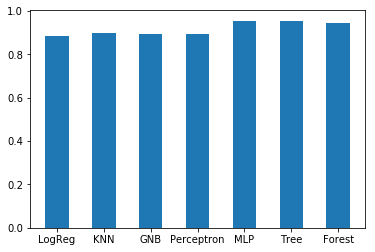

In [26]:
plt.bar([0,1,2,3,4,5,6],models['Accuracy'], align='center',width=0.5)
plt.xticks([0,1,2,3,4,5,6], ['LogReg','KNN','GNB','Perceptron','MLP','Tree','Forest'])
plt.show()

In [27]:
#looking for the important features
effective = pandas.DataFrame()
effective["feature_name"] = X.columns.tolist()
effective["feature_importance"] = forest.feature_importances_
type1_1_total=effective.loc[8:25, ['feature_importance']].sum()#0.043351
type2_1_total=effective.loc[26:44, ['feature_importance']].sum()#0.038514
type1_2_total=effective.loc[54:71,['feature_importance']].sum()#0.042346
type2_2_total=effective.loc[72:90, ['feature_importance']].sum()#0.038821
#Actually, summing importance values of dummy type columns will be better for measuring importance of the type.

In [28]:
for i in range(8,45):
    effective=effective.drop(effective.index[[8]])  

for i in range(54,91):
    effective=effective.drop(effective.index[[16]]) 

In [30]:
typeeff=pandas.DataFrame([["1_type1_total",0.043351],
                          ["1_type2_total",0.038514],
                          ["2_type1_total",0.042346],
                          ["2_type2_total",0.038821]],columns=("feature_name","feature_importance"))
               
effective=effective.append(typeeff)                  

In [31]:
effective.sort_values("feature_importance",ascending=False)

,feature_name,feature_importance
5,1_Speed,0.222918
50,2_Speed,0.212073
46,2_Attack,0.046871
1,1_Attack,0.046446
0,1_type1_total,0.043351
2,2_type1_total,0.042346
48,2_Sp. Atk,0.039641
3,2_type2_total,0.038821
3,1_Sp. Atk,0.038781
1,1_type2_total,0.038514


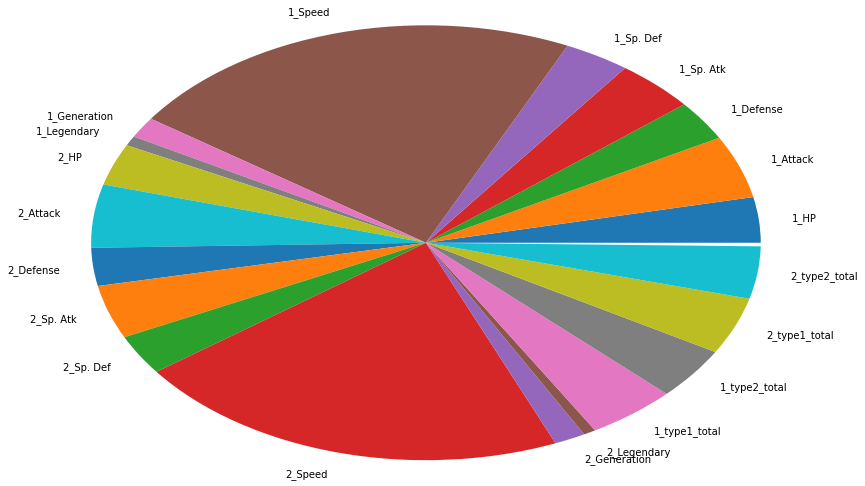

In [32]:
#visualizing it with a pie chart
plt.pie(effective["feature_importance"],labels=effective["feature_name"],radius=2.5)
plt.show()